In [61]:
import pandas as pd

data_frame = pd.read_csv("Clean_Dataset.csv")

In [62]:
data_frame

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [63]:
data_frame.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [64]:
data_frame.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [65]:
data_frame.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [66]:
data_frame.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [67]:
data_frame.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [68]:
data_frame["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [69]:
data_frame["duration"].min()

np.float64(0.83)

In [70]:
data_frame["duration"].max()

np.float64(49.83)

In [71]:
data_frame["duration"].median()

np.float64(11.25)

In [72]:
## Data PreProcessing

In [73]:
data_frame = data_frame.drop("Unnamed: 0", axis=1)
data_frame = data_frame.drop("flight", axis=1)

data_frame["class"] = data_frame["class"].apply(lambda x: 1 if x == "Business" else 0)

In [74]:
pd.factorize(data_frame.stops)

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['zero', 'one', 'two_or_more'], dtype='object'))

In [75]:
data_frame.stops

0         zero
1         zero
2         zero
3         zero
4         zero
          ... 
300148     one
300149     one
300150     one
300151     one
300152     one
Name: stops, Length: 300153, dtype: object

In [76]:
data_frame.stops = pd.factorize(data_frame.stops)[0]

In [77]:
data_frame

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [78]:
pd.get_dummies(data_frame.airline, prefix="airline")

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
300148,False,False,False,False,False,True
300149,False,False,False,False,False,True
300150,False,False,False,False,False,True
300151,False,False,False,False,False,True


In [79]:
data_frame.join(pd.get_dummies(data_frame.airline, prefix="airline")).drop("airline", axis=1)
data_frame.join(pd.get_dummies(data_frame.source_city, prefix="source")).drop("source_city", axis=1)
data_frame.join(pd.get_dummies(data_frame.destination_city, prefix="dest")).drop("destination_city", axis=1)
data_frame.join(pd.get_dummies(data_frame.arrival_time, prefix="arrival")).drop("arrival_time", axis=1)
data_frame.join(pd.get_dummies(data_frame.departure_time, prefix="departure")).drop("departure_time", axis=1)

,airline,source_city,stops,arrival_time,destination_city,class,duration,days_left,price,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,SpiceJet,Delhi,0,Night,Mumbai,0,2.17,1,5953,False,False,True,False,False,False
1,SpiceJet,Delhi,0,Morning,Mumbai,0,2.33,1,5953,False,True,False,False,False,False
2,AirAsia,Delhi,0,Early_Morning,Mumbai,0,2.17,1,5956,False,True,False,False,False,False
3,Vistara,Delhi,0,Afternoon,Mumbai,0,2.25,1,5955,False,False,False,False,True,False
4,Vistara,Delhi,0,Morning,Mumbai,0,2.33,1,5955,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,1,Evening,Hyderabad,1,10.08,49,69265,False,False,False,False,True,False
300149,Vistara,Chennai,1,Night,Hyderabad,1,10.42,49,77105,True,False,False,False,False,False
300150,Vistara,Chennai,1,Night,Hyderabad,1,13.83,49,79099,False,True,False,False,False,False
300151,Vistara,Chennai,1,Evening,Hyderabad,1,10.00,49,81585,False,True,False,False,False,False


In [80]:
data_frame

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [81]:
## Training Regression Model

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

print(type(data_frame))
print(data_frame.head())

<class 'pandas.core.frame.DataFrame'>
    airline source_city departure_time  stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening      0          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning      0        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning      0  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning      0      Afternoon           Mumbai   
4   Vistara       Delhi        Morning      0        Morning           Mumbai   

   class  duration  days_left  price  
0      0      2.17          1   5953  
1      0      2.33          1   5953  
2      0      2.17          1   5956  
3      0      2.25          1   5955  
4      0      2.33          1   5955  


In [83]:
x, y = data_frame.drop("price", axis=1), data_frame.price

In [84]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [85]:
reg.score(x_test, y_test)

0.9855263048158001

In [86]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_predicted = reg.predict(x_test)
print("R2: ", r2_score(y_test, y_predicted))
print("MAE: ", mean_absolute_error(y_test, y_predicted))
print("MSE: ", mean_squared_error(y_test, y_predicted))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_predicted)))

R2:  0.9855263048158001
MAE:  1065.8022851443422
MSE:  7440314.446388604
RMSE:  2727.693979607794


Text(0.5, 1.0, 'Prediction VS Actual Price')

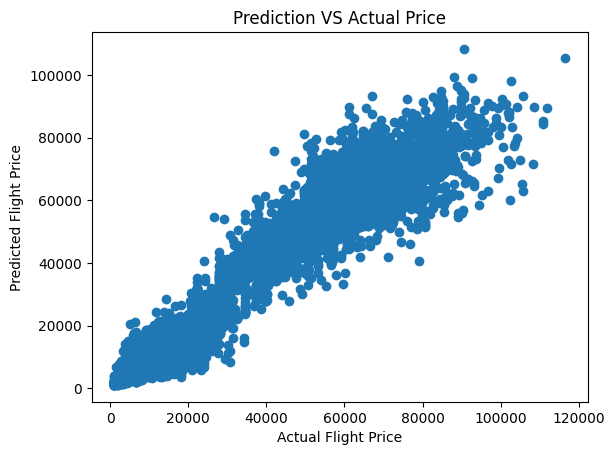

In [87]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predicted)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")

In [88]:
data_frame.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [89]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('class', np.float64(0.8797934068219357)),
 ('duration', np.float64(0.05765761280373825)),
 ('days_left', np.float64(0.01866594049441738)),
 ('airline_Air_India', np.float64(0.0049923719032764335)),
 ('airline_Vistara', np.float64(0.004984280781911285)),
 ('source_city_Delhi', np.float64(0.0038309976190986114)),
 ('destination_city_Delhi', np.float64(0.0033874395326167666)),
 ('source_city_Mumbai', np.float64(0.002194388606412611)),
 ('destination_city_Mumbai', np.float64(0.0018973329772988192)),
 ('destination_city_Kolkata', np.float64(0.0018183709930367298)),
 ('stops', np.float64(0.0017565421404866647)),
 ('source_city_Kolkata', np.float64(0.0017040396316152868)),
 ('destination_city_Hyderabad', np.float64(0.0015808682824675466)),
 ('arrival_time_Evening', np.float64(0.0014937414199124607)),
 ('source_city_Hyderabad', np.float64(0.0012802273704592495)),
 ('departure_time_Evening', np.float64(0.0011503461473037957)),
 ('source_city_Bangalore', np.float64(0.0011494918837606154)),
 ('

In [91]:
data_frame.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 6 artists>

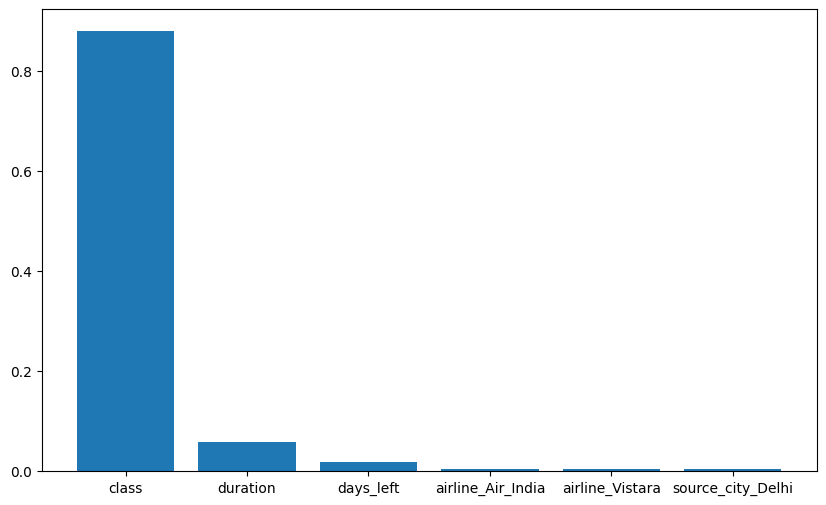

In [94]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:6]], [x[1] for x in sorted_importances[:6]])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Param1: A, B, C
# Param2: X, Y, Z

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"]
} 

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(100, 300),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5),
    "max_features": [1.0, "auto", "sqrt"]
}

reg = RandomForestRegressor(n_jobs=-1)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3,
                              scoring="neg_mean_squared_error", verbose=2, random_state=10, n_jobs=-1)

random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  38.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  40.8s


/Users/barraharrison/Desktop/2025 Coding/Flight-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/barraharrison/Desktop/2025 Coding/Flight-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/barraharrison/Desktop/2025 Coding/Flight-Price-Prediction/venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/barraharr

In [100]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_predicted = best_regressor.predict(x_test)
print("R2: ", r2_score(y_test, y_predicted))
print("MAE: ", mean_absolute_error(y_test, y_predicted))
print("MSE: ", mean_squared_error(y_test, y_predicted))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_predicted)))

R2:  0.9864505262449931
MAE:  1081.657821579277
MSE:  6965211.304877555
RMSE:  2639.168676852155


Text(0.5, 1.0, 'Prediction VS Actual Price')

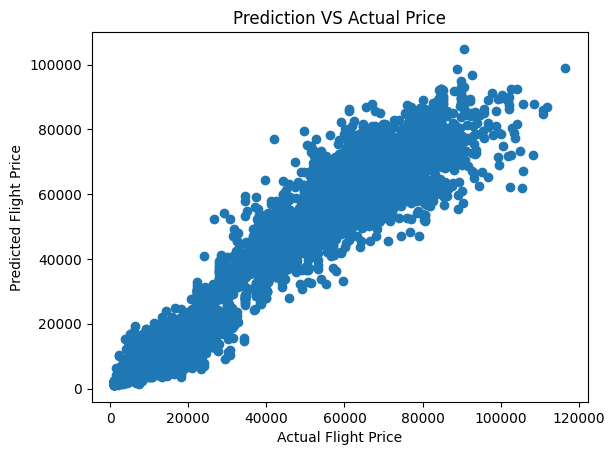

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s


In [101]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predicted)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")